<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/08_Min_DFA/MT1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6580, done.
remote: Counting objects: 100% (1946/1946), done.
remote: Compressing objects: 100% (818/818), done.
remote: Total 6580 (delta 1173), reused 1757 (delta 1048), pack-reused 4634 (from 1)
Receiving objects: 100% (6580/6580), 10.50 MiB | 12.59 MiB/s, done.
Resolving deltas: 100% (4178/4178), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist

### Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

### Showing why it is hard to concatenate DFA and why they are exponential sometimes

  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

#### Here are all the operations we can study and benefit from while building DFA

* re2nfa
* nfa2dfa
* dfa2nfa
* min_dfa
* rev_dfa
* min_dfa_brz
* mk_gnfa
* del_gnfa_states which is to convert NFA to RE
* comp_dfa


# ==> Every block of 5 contains at least two 0's <==

In [2]:
# This was coded in class

# ==> PLEASE LOOK AT THESE ARROWS IN THIS NOTEBOOK for interesting exercises <==

--------------------


#### We now will go through each of these commands with examples

----------------


Generating LALR tables


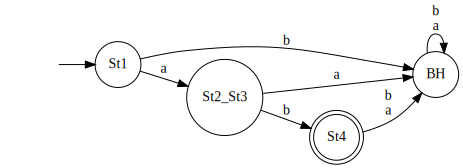

In [3]:
# How can we concatenate D1 and D2? Can't put a bridge from D1's final state to D2's initlal state. What will the bridge be labeled by?
# I'll use RE to draw DFA quickly... that part will be explained later.
# D1's language is "ab" and that of D2 is "cd"

D1 = min_dfa(nfa2dfa(re2nfa("ab")))
dotObj_dfa_w_bh(D1,FuseEdges=True)

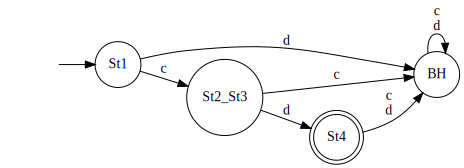

In [4]:
D2 = min_dfa(nfa2dfa(re2nfa("cd")))
dotObj_dfa_w_bh(D2,FuseEdges=True)

### Can't bridge from the first DFA's St4 to the second DFA's initial state (or other things)... there is no direct concatenation approach.

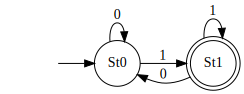

In [5]:
# Now let's see DFA for "Nth-last bit is a 1" grow exponentially large as N increases
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1"))))


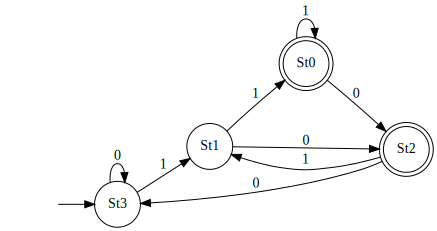

In [6]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)"))))

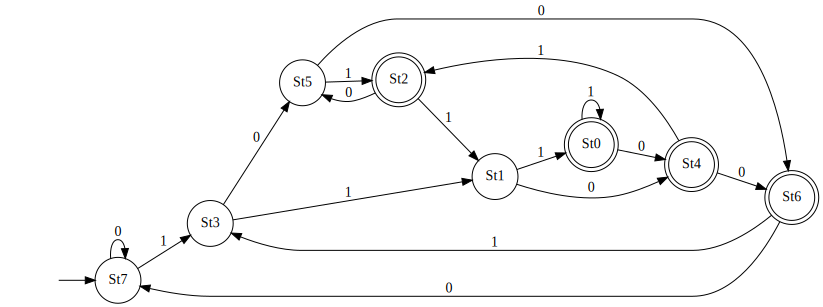

In [7]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)"))))

### It is getting larger; so let's check how the number of states grow.

In [8]:
min_dfa(nfa2dfa(re2nfa("(0+1)*1")))

{'Q': {'St0', 'St1'},
 'Sigma': {'0', '1'},
 'Delta': {('St0', '0'): 'St0',
  ('St0', '1'): 'St1',
  ('St1', '0'): 'St0',
  ('St1', '1'): 'St1'},
 'q0': 'St0',
 'F': {'St1'}}

In [9]:
# So, to determine the number of states, index-out the Python dictionary at "Q"
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1")))["Q"])

2

In [10]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)")))["Q"])

4

In [11]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)")))["Q"])

8

In [12]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)")))["Q"])

16

In [13]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)(0+1)")))["Q"])

32

#### OK, we see that
* The RE grows only by a length of five symbols, i.e. (0+1) and in the long run, it is a linear growth
* The generated DFA grows exponentially (exp number of states w.r.t. N)

### You may say what about the NFA?
* Well, we will show you what NFA are in a minute.
* But we will assure you (and soon show you) that the NFA will grow only by the number of states it takes to represent (0+1) and that will also be a fixed (small) number.



### **Here is a way to see various machines and play with them using the Jove Editor**

* Let's build many NFA using this Jove editor and animate
* The NFA to be built are these
  - NFA1  that moves to two states, i.e. I : a -> A, F
  - *IMMEDIATELY* notice that the DFA complementation algorithm does not work for NFA --- in fact there is no direct way to complement NFA
  - NFA2 that moves as follows : I : '' -> F
  - NFA3 that moves as follows
     - I1 : '' -> A
     - I2 : a -> F
  - NFA4 that moves as follows
     - I1 : a -> F1
     - I2 : b -> F2

* The language of an NFA
  - The language of an NFA is any string that takes the NFA from *some* starting state through a path (that may contain epsilon) to some final state


In [14]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


## INTRODUCING YOUR FIRST NFA, AND SIMULATING IT

In [15]:
# I'm going to redraw the NFA of Figure 7.7 as one with multiple initial states
# This is achieved using two initial states that start with the "I" state
# States with multiple next states upon one symbol are shown with a comma-separated list of next states

nfa_Fig7_dot_7_Variant = md2mc('''NFA
IA : '' -> B, C  !! multiple initial states
IG : 1  -> F     !! a dead-end state
B  : 1  -> D
C  : 0  -> E
D : ''  -> IA, IG
E : ''  -> IA, IG
''')


Generating LALR tables


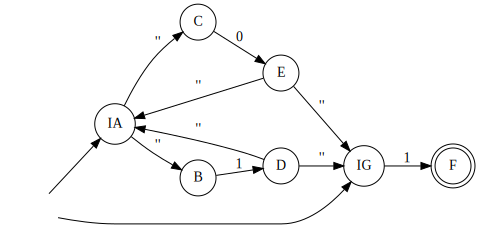

In [16]:
dotObj_nfa(nfa_Fig7_dot_7_Variant, FuseEdges=True)

# ==> nfa2dfa illustration <==

Generating LALR tables


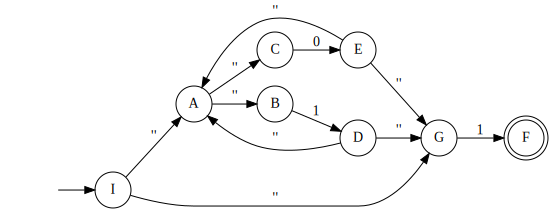

In [17]:
Fig77NFA = md2mc('''NFA
I : '' -> A, G
A : '' -> B, C  !! multiple initial states
G : 1  -> F     !! a dead-end state
B  : 1  -> D
C  : 0  -> E
D : ''  -> A, G
E : ''  -> A, G
''')
dotObj_nfa(Fig77NFA, FuseEdges=True)

In [18]:
EC_of_Q0 = Eclosure(Fig77NFA, {'I'})
EC_of_Q0

{'A', 'B', 'C', 'G', 'I'}

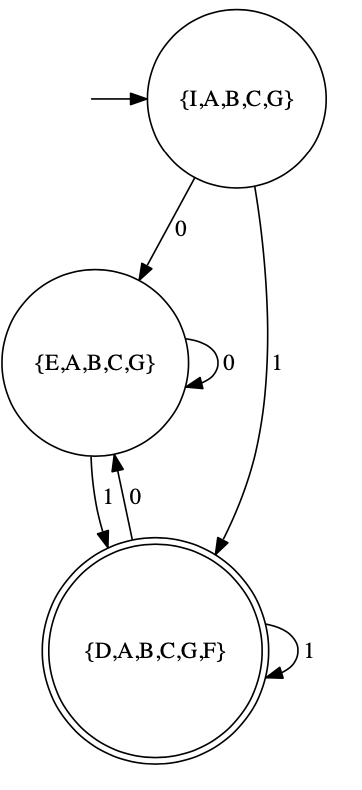

In [19]:
help(ec_step_nfa)

Help on function ec_step_nfa in module jove.Def_NFA:

ec_step_nfa(N, S, c, chatty=False)
    Helper for run_nfa
    ---
    In : N (consistent NFA)
         S (EClosed set of states)
         c (character in N's alphabet; does not equal "")
         chatty (Boolean): Verbose-mode optional parameter
    Return Eclosure of all states one "c" step away from S.



In [20]:
ec_step_nfa(Fig77NFA, EC_of_Q0, '1')

{'A', 'B', 'C', 'D', 'F', 'G'}

In [21]:
# To see what the formal structure of this NFA is, let's look at its Delta function
nfa_Fig7_dot_7_Variant

{'Q': {'B', 'C', 'D', 'E', 'F', 'IA', 'IG'},
 'Sigma': {'0', '1'},
 'Delta': {('IA', ''): {'B', 'C'},
  ('IG', '1'): {'F'},
  ('B', '1'): {'D'},
  ('C', '0'): {'E'},
  ('D', ''): {'IA', 'IG'},
  ('E', ''): {'IA', 'IG'}},
 'Q0': {'IA', 'IG'},
 'F': {'F'}}

In [22]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [23]:
help(ec_step_nfa)

Help on function ec_step_nfa in module jove.Def_NFA:

ec_step_nfa(N, S, c, chatty=False)
    Helper for run_nfa
    ---
    In : N (consistent NFA)
         S (EClosed set of states)
         c (character in N's alphabet; does not equal "")
         chatty (Boolean): Verbose-mode optional parameter
    Return Eclosure of all states one "c" step away from S.



### We see that the NFA transitions to multiple next states upon a single symbol
### In some cases it only transitions to ONE next state
### To treat these cases uniformly, we say that an NFA transitions to a **set** of next states each time





* The formal structure of an NFA is this : $(Q, \Sigma, \delta, Q_0, F)$
* This basically means ``An NFA is these five things''
* Here $Q$ is a finite set of states
* $\Sigma$ is as before (the actual alphabet). Even if an NFA moves on $\varepsilon$, the alphabet NEVER includes $\varepsilon$
* $\delta$ maps a state paired with either $\Sigma$ or $\varepsilon$ to a set of states
* $Q_0$ is a subset of states
* $F$ is a subset of $Q$



---------------------

### NOW for the fun experience. Let's animate the NFA to watch all of its conceptual steps!


In [24]:
from jove.AnimateNFA import *

In [25]:
AnimateNFA(nfa_Fig7_dot_7_Variant, FuseEdges=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

------------------------------------


### BACKGROUND MATERIAL TO TEACH YOU SOME BASICS + HAVE YOU DO QUIZ-3

### The idea of regular expressions will be reinforced in this exercise. When we have the language $\{a,bc\}\{d\}+\varepsilon$, the regular expression corresponding to this is (a+bc)(d)('') or even (a+bc)d('') or finally also (a+bc)d'' where we assume that having the parenthesis around d and '' makes it more readable. Let's test this out.

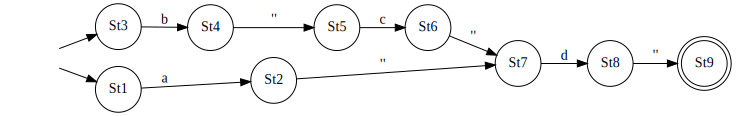

In [26]:
# You may put parentheses around the '' string as below
dotObj_nfa(re2nfa("(a+bc)(d)('')"))

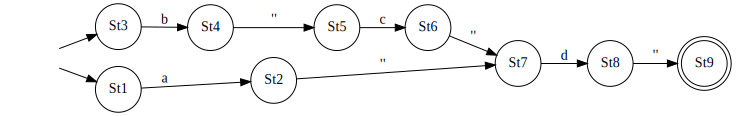

In [27]:
# In this case, the parser is smart enough to work even w/o the parentheses
dotObj_nfa(re2nfa("(a+bc)d''"))

-------------------------
-------------------------
# START OF QUIZ-3
-------------------------
-------------------------

### Question-1: Teaches you about Regular Expressions. Be reading Chapter 8 of the book.

* Given any alphabet $\Sigma$ (say $\Sigma = \{a,b\}$), here are all the regular expressions (RE)
  - $\varepsilon$ is a RE *denoting the language* with the empty string \{ $\varepsilon$ \}, otherwise known as the Unit language
     - We will say $L$($\varepsilon$) = \{ $\varepsilon$ \}
     - Or in a more friendly syntax, $L$('') = \{ $\varepsilon$ \}
  - $x \in \Sigma$ is an RE. For us, a and b are REs.
     - a is an RE. I.e. $L$(a) = \{ $a$\}
     - Similarly, b is an RE. I.e. $L$(b) = \{$b$\}
  - If $R_1$ and $R_2$ are RE, then
     - $R_1 + R_2$ is an RE.  
       - More specifically $L$($R_1$ + $R_2$) = $L$($R_1$) $\cup$ $L$($R_2$)
     - $R_1 R_2$ is an RE
       - More specifically $L$($R_1$  $R_2$) = $L$($R_1$)  $L$($R_2$)
  - If $R$ is an RE, then $R^*$ is an RE denoting \{ L($R$) \}$^*$

### What is the language of this RE? ((a+bc)d(''))*
### Ans: $((\{a\}\cup(\{b\}\{c\}))(\{d\})(\{ '' \}))^*$

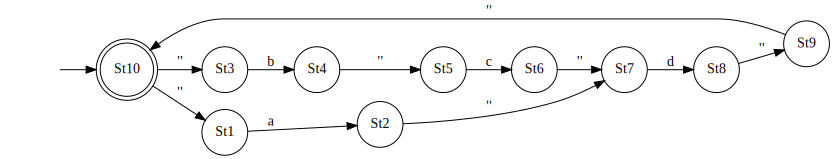

In [28]:
# What is the language denoted by the RE ((a+bc)d(''))* ? Let's find out
dotObj_nfa(re2nfa("((a+bc)d(''))*"))
# We will find it out by reading-out the language of the NFA...

#### Question-1: What is the rule for doing a Concatenation? Select in the Quiz!

## Question-2

-----------------------

#### Question-2 : What is the rule for doing an "OR" or + ?  . Select in the Quiz!

------------------------------

## Question-3

-----------------------

#### Question-3: What is the rule for doing a star ?  Select in the Quiz!

------------------------------

## Question-4

-----------------------

#### Question-4: What is the relationship between the RE (a+b)* and (a*b*)* ?

#### Select in the Quiz!

------------------------------

## Question-5

-----------------------

#### Question-5: How do I check the work in Question 4?  Select in the Quiz! Notice I deliberately leave out one min_dfa!

In [29]:
D1 = min_dfa(nfa2dfa(re2nfa("(a*b*)*")))
D2 = nfa2dfa(re2nfa("(a+b)*"))

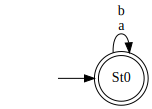

In [30]:
dotObj_dfa(D1, FuseEdges=True)

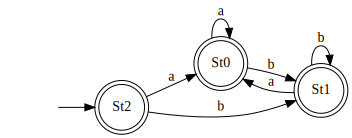

In [31]:
dotObj_dfa(D2, FuseEdges=True)

In [32]:
langeq_dfa(D1,D2)

True

In [33]:
iso_dfa(D1,D2)

False

------------------------------

## Question-6

-----------------------

#### Question-6: How does min_dfa work? Let's find out! Select in the Quiz! Reading from the book Page 74, Figure 6.7

# ==> min_dfa illustration <==

Generating LALR tables


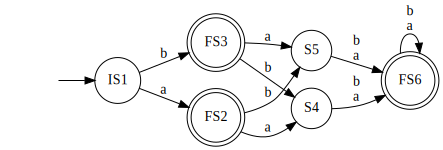

In [34]:
Fig67DFA = md2mc('''DFA
IS1 : a -> FS2
IS1 : b -> FS3

FS2 : a -> S4
FS2 : b -> S5

FS3 : a -> S5
FS3 : b -> S4

S4 : a|b -> FS6
S5 : a|b -> FS6

FS6 : a|b -> FS6
''')
dotObj_dfa(Fig67DFA, FuseEdges=True)

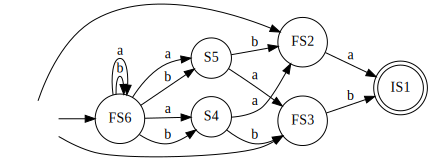

In [35]:
NFig67 = rev_dfa(Fig67DFA)
dotObj_nfa(NFig67)

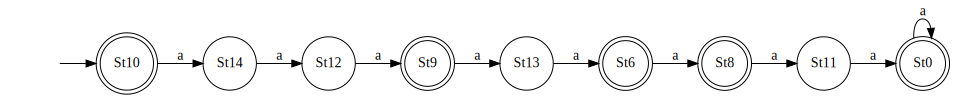

In [36]:
RE357 = "(aaa+aaaaaa+aaaaa)*"
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE357))))

In [37]:
DNFig67 = nfa2dfa(NFig67)

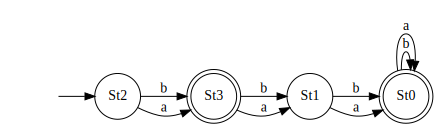

In [38]:
dotObj_dfa(DNFig67)

In [39]:
min_Fig67DFA = min_dfa(Fig67DFA, chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  IS1  and  FS6  are 0-distinguished.
States  IS1  and  FS2  are 0-distinguished.
States  IS1  and  FS3  are 0-distinguished.
States  FS6  and  S4  are 0-distinguished.
States  FS6  and  S5  are 0-distinguished.
States  FS2  and  S4  are 0-distinguished.
States  FS2  and  S5  are 0-distinguished.
States  FS3  and  S4  are 0-distinguished.
States  FS3  and  S5  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 FS6 	 0
	 FS2 	 0	.
	 FS3 	 0	.	.
	 S4 	 .	0	0	0
	 S5 	 .	0	0	0	.

		 IS1	FS6	FS2	FS3	S4
--------------------------------------------- 
 
Seeing if states  IS1  and  S4  can now be distinguished by any symbol.
   The next states reached via symbol  b  are:  FS3  and  FS6
   Cannot distinguish y

#### Question-6: How were the 0-distinguishable states chosen? Select from Quiz-3!

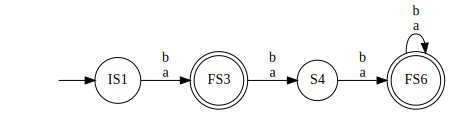

In [40]:
dotObj_dfa(min_Fig67DFA, FuseEdges=True)

# ==> Try Brzozowski's algorithm on Fig67DFA <==

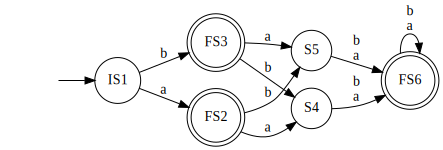

In [41]:
dotObj_dfa(Fig67DFA, FuseEdges=True)

In [42]:
#mFig67DFA = min_dfa(Fig67DFA, verbose)
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



------------------------------

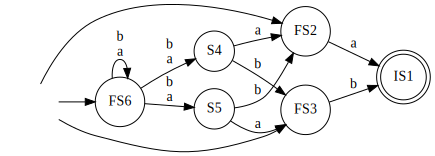

In [43]:
revFig67_NFA = rev_dfa(Fig67DFA)
dotObj_nfa(revFig67_NFA, FuseEdges=True)

#==> Equal changes RE <==

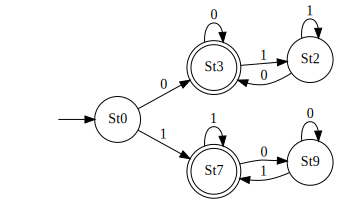

In [44]:
# RE for equal changes ... or begins/ends in the same symbol

RE_eqch   = ''' 0 (0 + (1 1* 0))*
               +
               1 (1 + (0 0* 1))*
            '''
min_DFA_eqch = min_dfa(nfa2dfa(re2nfa(RE_eqch)))

dotObj_dfa(min_DFA_eqch, FuseEdges=True)

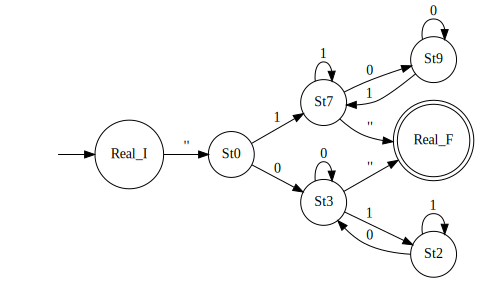

In [45]:
gnfa_eqch = mk_gnfa_from_D(min_DFA_eqch)
dotObj_gnfa(gnfa_eqch, FuseEdges=True)

In [46]:
(G, DO, RE) = del_gnfa_states(gnfa_eqch)

**** Eliminating state St0 ****
**** Eliminating state St7 ****
**** Eliminating state St3 ****
**** Eliminating state St9 ****
**** Eliminating state St2 ****


In [47]:
RE

'((((0 ((0)* 1)) (((((0 ((0)* 1)) + 1) + 1))* (0 (0)*))) + ((((1 ((1)* 0)) (((((1 ((1)* 0)) + 0) + 0))* (1 (1)*))) + (((0 (0)*) + (1 (1)*)) + (1 (1)*))) + (((0 (0)*) + (1 (1)*)) + (1 (1)*)))) + ((((1 ((1)* 0)) (((((1 ((1)* 0)) + 0) + 0))* (1 (1)*))) + (((0 (0)*) + (1 (1)*)) + (1 (1)*))) + (((0 (0)*) + (1 (1)*)) + (1 (1)*))))'

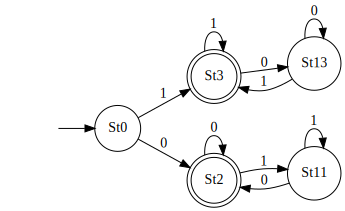

In [48]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

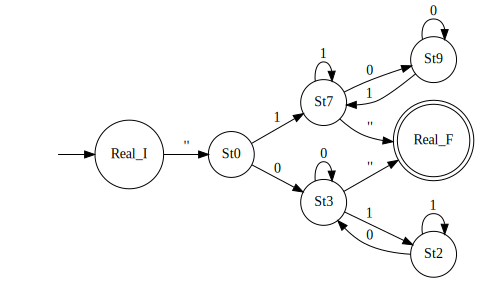

In [50]:
DO[0]

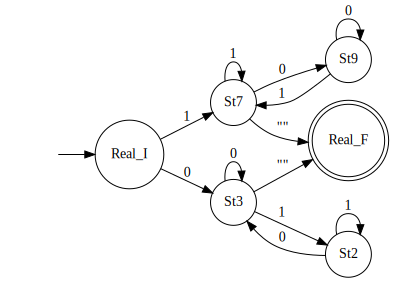

In [51]:
DO[1]

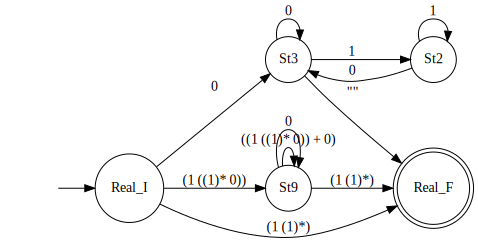

In [52]:
DO[2]

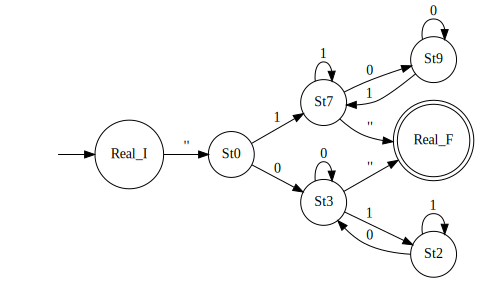

In [55]:
dotObj_gnfa(gnfa_eqch)

In [56]:
(G1, DO1, RE1) = del_gnfa_states(gnfa_eqch, DelList=['St0','St2','St9','St3','St7'])
#help(del_gnfa_states)

**** Eliminating state St0 ****
**** Eliminating state St2 ****
**** Eliminating state St9 ****
**** Eliminating state St3 ****
**** Eliminating state St7 ****


In [57]:
RE1

'(((1 ((((0 ((0)* 1)) + 1) + 1))*) + (0 ((((1 ((1)* 0)) + 0) + 0))*)) + (0 ((((1 ((1)* 0)) + 0) + 0))*))'

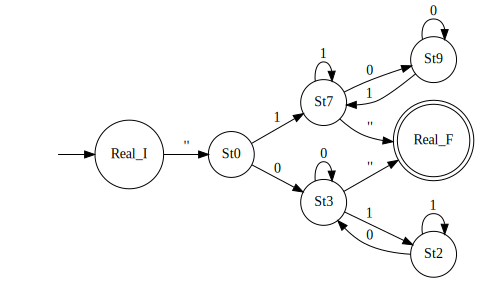

In [58]:
DO1[0]

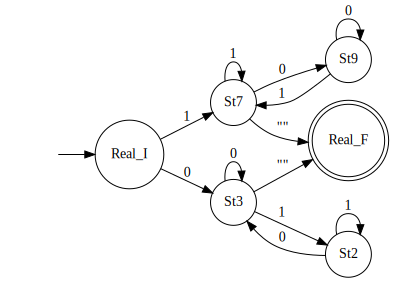

In [59]:
DO1[1]

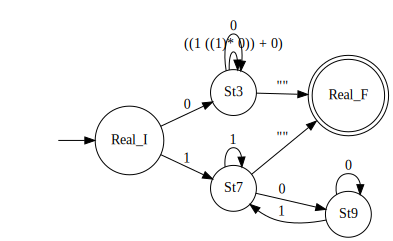

In [60]:
DO1[2]

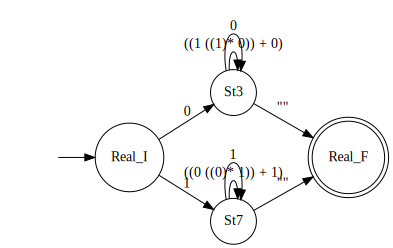

In [61]:
DO1[3]

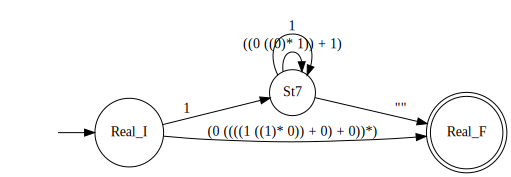

In [62]:
DO1[4]

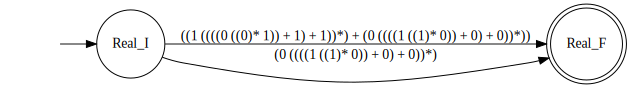

In [63]:
DO1[5]

Generating LALR tables


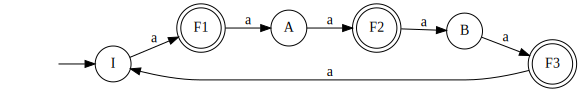

In [64]:
Ring_DFA = md2mc('''DFA
I  : a -> F1
F1 : a -> A
A  : a -> F2
F2 : a -> B
B  : a -> F3
F3 : a -> I
''')
dotObj_dfa(Ring_DFA)

In [65]:
Rmin = min_dfa(Ring_DFA, chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  I  and  F1  are 0-distinguished.
States  I  and  F2  are 0-distinguished.
States  I  and  F3  are 0-distinguished.
States  A  and  F1  are 0-distinguished.
States  A  and  F2  are 0-distinguished.
States  A  and  F3  are 0-distinguished.
States  F1  and  B  are 0-distinguished.
States  B  and  F2  are 0-distinguished.
States  B  and  F3  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 A 	 .
	 F1 	 0	0
	 B 	 .	.	0
	 F2 	 0	0	.	0
	 F3 	 0	0	.	0	.

		 I	A	F1	B	F2
--------------------------------------------- 
 
Seeing if states  I  and  A  can now be distinguished by any symbol.
   The next states reached via symbol  a  are:  F1  and  F2
   Cannot distinguish yet, via  a
 
Seeing if states  I  and 

## Question-7

#### The first "Found a Distinguishable Pair" corresponds to which pair of states? Why was this pair found distinguishable?

-----------------------

------------------------------

## Question-8

-----------------------

#### Finally how do we decide that S5 and S4 are equivalent?

------------------------------

## Question-9

-----------------------

#### How are IS1 and S4 distinguished by the string "aa"?

------------------------------

## Question-10

-----------------------

#### Why were IS1 and S4 not distinguished by "a" ?

------------------------------

### This notebook BELOW was assigned for MT1 practice in 2022. You can see that below this text box and keep that in mind as a learning goal. But above this text box, I have set material for Quiz-5 that gradually builds toward this goal.

In [66]:
def diff_RE(R1,R2):
    '''
    Given R1 and R2, here is the the code to return (D1,D2)
    where D1 is the min DFA of Lang(R1)-Lang(R2)
    and D2 is the min DFA of Lang(R2)-Lang(R1)
    '''
    MD1=min_dfa_brz(nfa2dfa(re2nfa(R1)))
    MD2=min_dfa_brz(nfa2dfa(re2nfa(R2)))

    cMD1 = comp_dfa(MD1)
    cMD2 = comp_dfa(MD2)

    D1minus2 = min_dfa_brz(intersect_dfa(MD1, cMD2))
    D2minus1 = min_dfa_brz(intersect_dfa(MD2, cMD1))

    return (D1minus2, D2minus1)


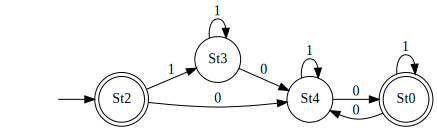

In [67]:
# Sigma = {0,1}; "2n zeros for n >= 0"

RE2 = "(1* 0 1* 0 1*)*"
m2 = min_dfa(nfa2dfa(re2nfa(RE2)))
dotObj_dfa(m2)

In [68]:
dotObj_dfa(m2).render('m2')

'm2.pdf'

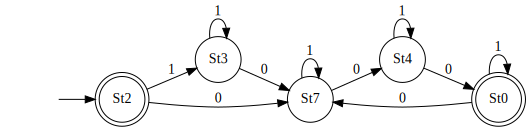

In [69]:
# 3n 0's, n >= 0

RE3 = "(1* 0 1* 0 1* 0 1*)*"
m3 = min_dfa(nfa2dfa(re2nfa(RE3)))
dotObj_dfa(m3)

In [70]:
dotObj_dfa(m3).render('m3')

'm3.pdf'

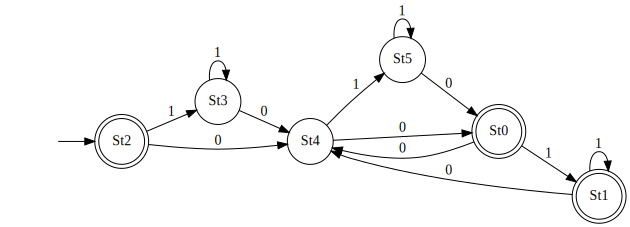

In [71]:
dfa2big = nfa2dfa(re2nfa(RE2))
dotObj_dfa(dfa2big)

In [72]:
dfa_unmin = md2mc('''

DFA
IF : 1  ->  St3
IF : 0  ->  St4
St4: 0  ->  F0
St4: 1  ->  St5
St3: 0  ->  St4
St3: 1  ->  St3
F0 : 0  ->  St4
F0 : 1  ->  F1
St5: 0  ->  F0
St5: 1  ->  St5
F1 : 0  ->  St4
F1 : 1  ->  F1
''')

Generating LALR tables


In [73]:
dotObj_dfa(dfa_unmin).render('dfa_unmin')

'dfa_unmin.pdf'

In [74]:
dfa_min = min_dfa(dfa_unmin, state_name_mode = 'verbose', chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  F1  and  St3  are 0-distinguished.
States  F1  and  St5  are 0-distinguished.
States  F1  and  St4  are 0-distinguished.
States  St3  and  IF  are 0-distinguished.
States  St3  and  F0  are 0-distinguished.
States  St5  and  IF  are 0-distinguished.
States  St5  and  F0  are 0-distinguished.
States  St4  and  IF  are 0-distinguished.
States  St4  and  F0  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 St3 	 0
	 St5 	 0	.
	 St4 	 0	.	.
	 IF 	 .	0	0	0
	 F0 	 .	0	0	0	.

		 F1	St3	St5	St4	IF
--------------------------------------------- 
 
Seeing if states  F1  and  IF  can now be distinguished by any symbol.
   The next states reached via symbol  0  are:  St4  and  St4
      Nope. Symbol  0  could

In [75]:
dfa_unmin_rev = rev_dfa(dfa_unmin)

In [76]:
dotObj_nfa(dfa_unmin_rev).render('dfa_unmin_rev')

'dfa_unmin_rev.pdf'

In [77]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



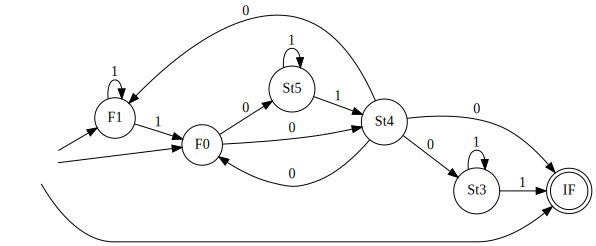

In [78]:
dotObj_nfa(dfa_unmin_rev)

In [79]:
dfa_unmin_rev_det = nfa2dfa(dfa_unmin_rev, STATENAME_MAXSIZE=80)

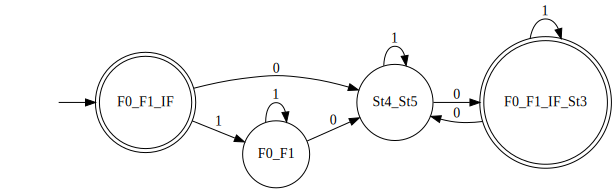

In [80]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80)

In [81]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80).render('dfa_unmin_rev_det')

'dfa_unmin_rev_det.pdf'

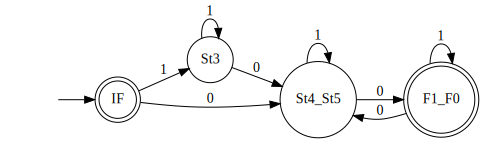

In [82]:
dotObj_dfa(dfa_min)

In [83]:
mEven0_mOdd0 = intersect_dfa(m2,m3)

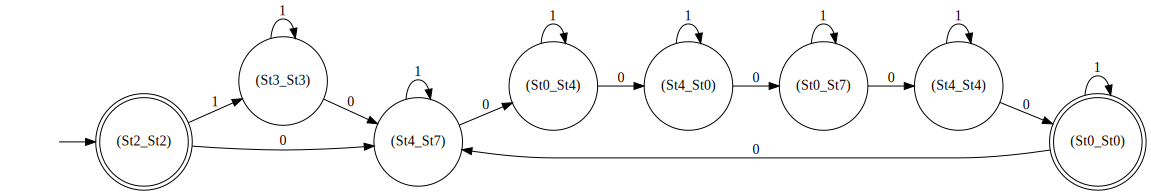

In [84]:
dotObj_dfa(mEven0_mOdd0)

In [85]:
dotObj_dfa(mEven0_mOdd0).render('m2_and_m3')

'm2_and_m3.pdf'

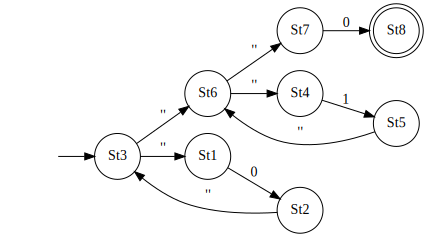

In [86]:
nfa0s1s0 = re2nfa("0* 1* 0")
dotObj_nfa(nfa0s1s0)

In [87]:
dotObj_nfa(nfa0s1s0).render('nfa0s1s0')

'nfa0s1s0.pdf'

In [88]:
dfa0s1s0 = nfa2dfa(nfa0s1s0, STATENAME_MAXSIZE=80)

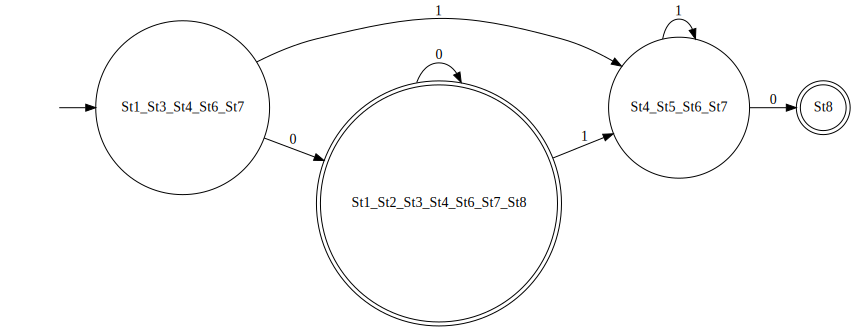

In [89]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80)

In [90]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80).render('dfa0s1s0')

'dfa0s1s0.pdf'

In [91]:
no010 = md2mc('''
DFA
IF : 1 -> IF
IF : 0 -> F0

F0 : 0 -> F0
F0 : 1 -> F1

F1 : 0 -> BH
F1 : 1 -> IF

BH : 0|1 -> BH

''')

Generating LALR tables


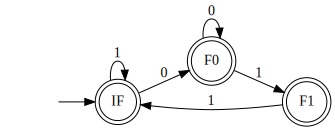

In [92]:
dotObj_dfa(no010)

In [93]:
dotObj_dfa(no010).render('no010')

'no010.pdf'

# To verify, define has010 and intersect.

In [94]:
has010 = min_dfa(nfa2dfa(re2nfa("(0+1)*010(010)*")))

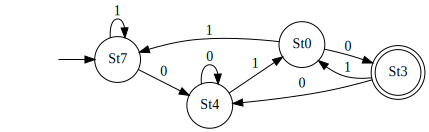

In [95]:
dotObj_dfa(has010)

In [96]:
no010_and_has010 = intersect_dfa(no010, has010)

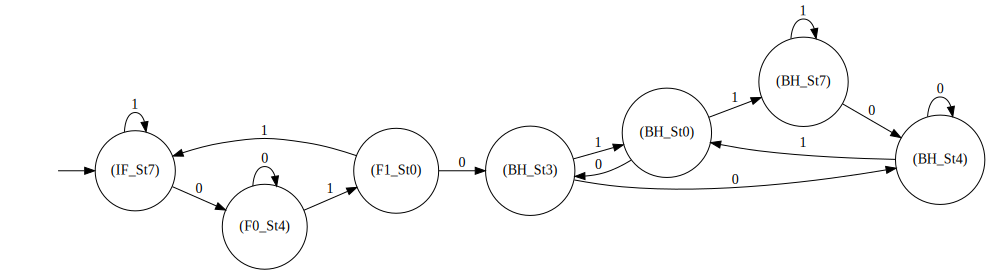

In [97]:
dotObj_dfa(no010_and_has010)

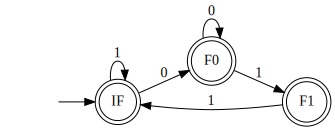

In [98]:
dotObj_dfa(no010)

In [99]:
REno010 =   "1* ( '' + 00* ( '' + 1(11*00*1)* ( '' + 11* ( '' + 00* ))))"

In [100]:
no010_RE = min_dfa(nfa2dfa(re2nfa(REno010)), chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  St7  and  BH  are 0-distinguished.
States  BH  and  St3  are 0-distinguished.
States  BH  and  St8  are 0-distinguished.
States  BH  and  St5  are 0-distinguished.
States  BH  and  St9  are 0-distinguished.
States  BH  and  St4  are 0-distinguished.
States  BH  and  St6  are 0-distinguished.
States  BH  and  St2  are 0-distinguished.
States  BH  and  St10  are 0-distinguished.
States  BH  and  St1  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 BH 	 0
	 St3 	 .	0
	 St8 	 .	0	.
	 St5 	 .	0	.	.
	 St9 	 .	0	.	.	.
	 St4 	 .	0	.	.	.	.
	 St6 	 .	0	.	.	.	.	.
	 St2 	 .	0	.	.	.	.	.	.
	 St10 	 .	0	.	.	.	.	.	.	.
	 St1 	 .	0	.	.	.	.	.	.	.	.

		 St7	BH	St3	St8	St5	St9	St4	St6	St2	St10
----------------------

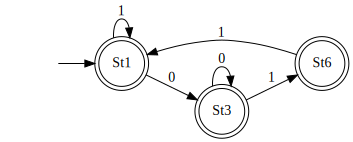

In [101]:
dotObj_dfa(no010_RE)

In [102]:
nfano010 = dfa2nfa(no010)

# ==> mk_gnfa and del_gnfa_states <==

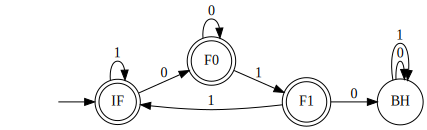

In [103]:
dotObj_nfa(nfano010)

In [104]:
gnfa010 = mk_gnfa(nfano010)

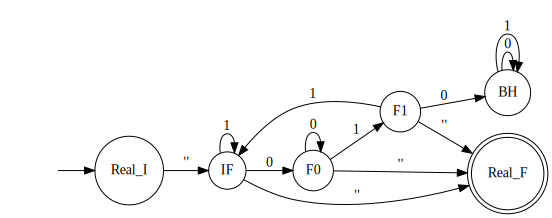

In [105]:
dotObj_gnfa(gnfa010)

In [106]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [107]:
(GF,DO,RE) = del_gnfa_states(gnfa010)

**** Eliminating state BH ****
**** Eliminating state F1 ****
**** Eliminating state IF ****
**** Eliminating state F0 ****


In [108]:
RE

'(((((1)* 0) ((((((1 1) ((1)* 0)) + 0) + 0))* ((((1 1) (1)*) + ((1 + "") + "")) + ((1 + "") + "")))) + (1)*) + (1)*)'

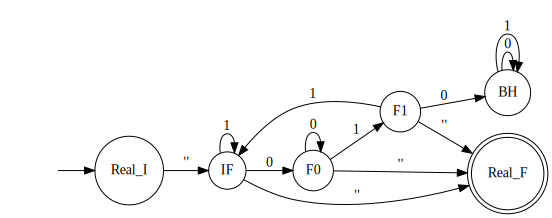

In [109]:
DO[0]

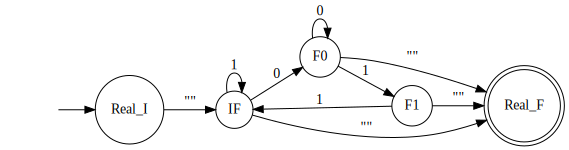

In [110]:
DO[1]

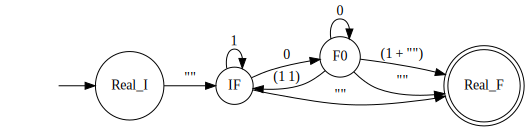

In [111]:
DO[2]

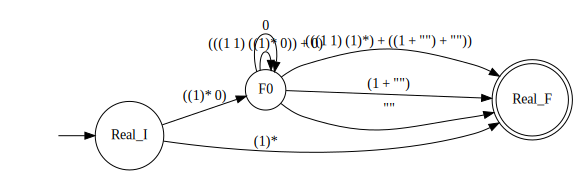

In [112]:
DO[3]